# Inspecting Run Properties

## Parameters

In [13]:
ALIGNMENT_SEQUENCE = "baseline"
TEMPORAL_ALIGNMENT_TOLERANCE = 0.1
ALIGNMENT_WORD_NORMALIZATION = True

## Setup

In [14]:
import os
import sys
sys.path.append("..")

from src.eval.SampleResult import SampleResult
from src.eval.utils.draw_alignments import draw

In [15]:
RESULTS_05_05 = "../out/2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo"
RESULTS_05_02 = "../out/2025-05-02_10-50-33_librispeech-pc-test-clean_large-v3-turbo"
RESULTS_DUMMY = "../out/2025-06-09_13-19-18_dummy_tiny"

In [16]:
RESULT_DIR = RESULTS_DUMMY

In [17]:
def load_single_sample(result_dir, sample_id):
    s = SampleResult.load_by_id(result_dir, sample_id)
    s.build_alignments(
        normalize_words=ALIGNMENT_WORD_NORMALIZATION,
        align_to=ALIGNMENT_SEQUENCE,
        temporal_tolerance=TEMPORAL_ALIGNMENT_TOLERANCE,
    )
    return s

In [18]:
files = os.listdir(RESULT_DIR)
files = [f for f in files if f.endswith("final.json")]

# get ids from the first part of the filename separated by "_"
file_ids = [f.split("_")[0] for f in files]

samples = [SampleResult.load_by_id(RESULT_DIR, file_id) for file_id in file_ids]

/home/niko/Code/streaming-asr-evaluation/notebooks/../src/eval/SampleResult.py:158: UserWarning: Final MFA file not found: ../out/2025-06-09_13-19-18_dummy_tiny/mfa/61-70968-0000/61-70968-0000.TextGrid
  warnings.warn(f"Final MFA file not found: {final_mfa_path}")
/home/niko/Code/streaming-asr-evaluation/notebooks/../src/eval/SampleResult.py:158: UserWarning: Final MFA file not found: ../out/2025-06-09_13-19-18_dummy_tiny/mfa/61-70970-0000/61-70970-0000.TextGrid
  warnings.warn(f"Final MFA file not found: {final_mfa_path}")


## Properties

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### Content Window Size

Previously it was observerd, that sometimes the content window for transcription would not be cutoff. This should theoretically happend automatically.

In [20]:
window_sizes = np.concatenate([[p.window[1] - p.window[0] for p in s.partials] for s in samples])
print("Min:", window_sizes.min())
print("Max:", window_sizes.max())

Min: 1.0
Max: 25.549999999999983


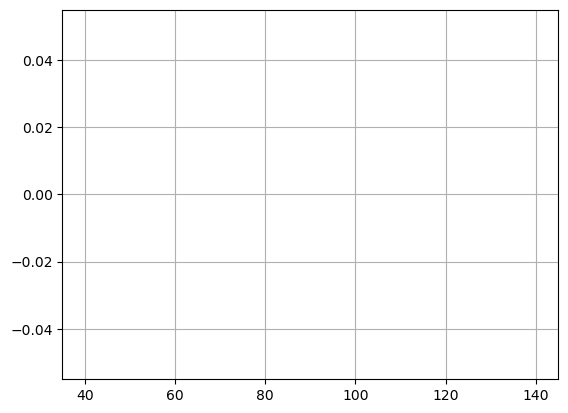

In [21]:
plt.hist(window_sizes, bins=100, range=(40,140))
plt.grid()

In [22]:
threshold = 40
samples_with_big_windows = [s for s in samples if any(p.window[1] - p.window[0] > threshold for p in s.partials)]
print(len(samples_with_big_windows))
for s in samples_with_big_windows:
    print(s.sample_id, [p.window[1] - p.window[0] for p in s.partials if p.window[1] - p.window[0] > threshold])

0


672-122797-0000  
2094-142345-0000  
7729-102255-0000  
4992-23283-0000  
8555-284449-0000  
4970-29093-0000  
5683-32865-0000  

In [23]:
for s in samples:
    s.build_alignments(s, align_to="final")

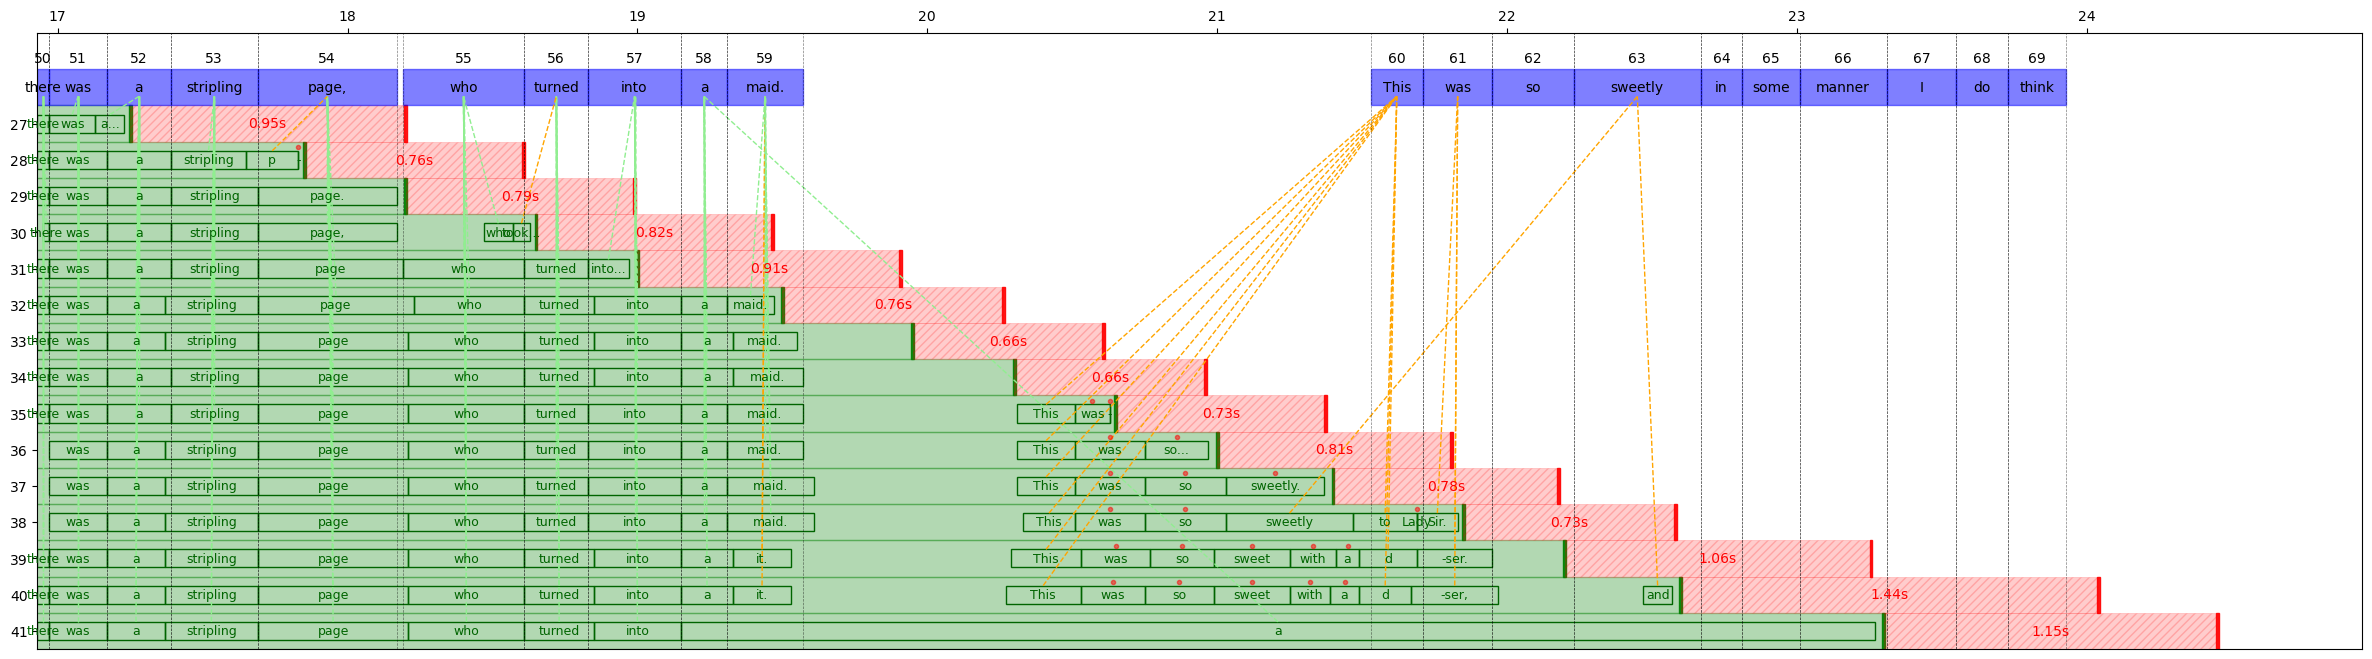

In [27]:
s = samples[0]
draw(s, 50, 20)